<a href="https://colab.research.google.com/github/GabrielVogel/Implementa-es/blob/master/Rede_neural_usando_apenas_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_der(z):
    return (1 - sigmoid(z)) * sigmoid(z)

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

def CategoricalCrossEntropy(y,y_pred):
    return -np.sum(y * np.log(y_pred))


def relu(Z):

  return np.maximum(Z,0)

def der_relu(x):
  x[x<=0] = 0
  x[x>0] = 1
  return x

In [0]:
from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [0]:
X_train = X_train.reshape(X_train.shape[0],28 * 28)
Ytrain = np.zeros((60000, 10))
for i in range(60000):
    Ytrain[i][y_train[i]]= 1
Ytest= np.zeros((10000, 10))
for i in range(10000):
    Ytest[i][y_test[i]]= 1

In [0]:
D = 784
K = Ytrain.shape[1]
n = 1000

In [0]:
def forward_pass(X,W,b):
    
    Z = np.dot(X,W) + b
    return relu(Z),Z

def ForwardPropagation(X,params):
    
    L = len(params) // 2
    Ao = X
    Zs = []
    Als = [Ao]
    for l in range(1,L):
        Al, Zl = forward_pass(Ao,params["W"+str(l)],params["b"+str(l)])
        Zs.append(Zl)
        Als.append(Al)
        Ao = Al
    ZL = np.dot(Ao, params["W"+str(L)]) + params["b"+str(L)]
    Zs.append(ZL)
    AL = softmax(ZL)
    return AL,Zs,Als
        

In [0]:
def LastLayerBackward(y, y_hat,W,Al_1):
    dL_dz2 = y_hat - y
    db = dL_dz2.sum(axis = 0) * 1/ n
    dW = np.dot(Al_1.T,dL_dz2) * 1/n
    dAl_1 = np.dot(dL_dz2,W.T)
    
    return dW,db,dAl_1
    

In [0]:
def OtherLayerBackwards(dAl,Z,W,Al_1):
    dL_dz = dAl * der_relu(Z)
    db = dL_dz.sum(axis = 0) * 1/ n
    dW = np.dot(Al_1.T,dL_dz) * 1/n
    dAl_1 = np.dot(dL_dz,W.T)
    
    return dW,db,dAl_1

In [0]:
def train(X,Y,params,learning_rate,epochs):
    
    L = len(params) // 2
    losses = []
    
    for epoch in range(epochs):
        pred, Zs,Als = ForwardPropagation(X,params)
        l = CategoricalCrossEntropy(Y,pred)
        losses.append(l)
        if epoch % 200 == 0:
          print(f"Epoch {epoch} : {l}")
        
        dW,db,dAl_1 = LastLayerBackward(Y,pred,params["W"+str(L)],Als[-1])
        params["W"+str(L)] -= learning_rate * dW
        params["b"+str(L)] -= learning_rate * db
        
        for l in reversed(range(L-1)):
            dw,db,dAl_1 = OtherLayerBackwards(dAl_1,Zs[l],params["W"+str(l+1)],Als[l])
            params["W"+str(l+1)] -= learning_rate * dw
            params["b"+str(l+1)] -= learning_rate * db
            
    return losses

In [0]:
def fit(X,y,Dims,epochs,learning_rate):

    params = {}

    for i in range(len(Dims)-1):
        params["W"+str(i+1)] = np.random.randn(Dims[i],Dims[i+1]) * 0.01
        params["b"+str(i+1)] = np.zeros(Dims[i+1])  
        
    
    losses = train(X,y,params,learning_rate,epochs)
    return losses,params

In [0]:
def PlotCurve(losses):
    plt.plot(losses)

In [99]:
dims = [D,64,K]
n = 10000
losses,params = fit(X_train[:n],Ytrain[:n],dims, epochs = 1000,learning_rate=10e-4)

Epoch 0 : 57069.81311301795
Epoch 200 : 6123.106653543159
Epoch 400 : 4606.036077125276
Epoch 600 : 3760.4419049540984
Epoch 800 : 3174.4563430077355


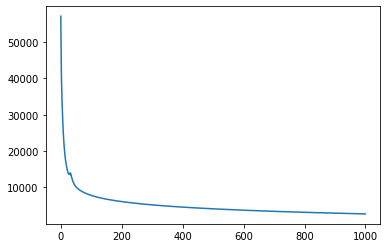

In [100]:
PlotCurve(losses)

In [101]:
losses[-1]

2738.4697900244114

In [0]:
AL,_,_ = ForwardPropagation(X_test.reshape(10000,784),params)

In [0]:
total = 10000
counts = 0
for i,x in enumerate(softmax(AL)):
  if x.argmax() == Ytest[i].argmax():
    counts += 1

In [112]:
counts / total * 100 

94.6